In [1]:
#importing libs
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

## 1. Importing cleaned dataset

In [2]:
# creating the path
path=r"C:\Users\Sam\Desktop\CF\Project 6 WORLD BANK"

In [3]:
# importing frame
df=pd.read_csv(os.path.join(path,"SPI_2016-2022_clean.csv"))

In [4]:
#checking for execution
df.head(3)

,Country,Date,Pillar 1 - Data Use - Score,Pillar 2 - Data Services - Score,Pillar 3 - Data Products - Score,Pillar 4 - Data Sources - Score,Pillar 5 - Data Infrastructure - Score,SPI Overall Score,Income,Region,Population
0,Finland,2022,100.0,96.433333,88.4875,83.258333,100.0,93.635833,High income,Europe & Central Asia,5556106.0
1,Norway,2022,100.0,97.133333,87.2375,83.108333,100.0,93.495833,High income,Europe & Central Asia,5457127.0
2,Canada,2022,100.0,92.600000,83.6875,88.325000,100.0,92.922500,High income,North America,38929902.0


## 2. Cleaning the frame

In [5]:
df.shape

(1524, 11)

In [6]:
df.columns

Index(['Country', 'Date', 'Pillar 1  - Data Use - Score',
       'Pillar 2 - Data Services - Score', 'Pillar 3 - Data Products - Score',
       'Pillar 4 - Data Sources - Score',
       'Pillar 5 - Data Infrastructure - Score', 'SPI Overall Score', 'Income',
       'Region', 'Population'],
      dtype='object')

In [7]:
df.dtypes

Country                                    object
Date                                        int64
Pillar 1  - Data Use - Score              float64
Pillar 2 - Data Services - Score          float64
Pillar 3 - Data Products - Score          float64
Pillar 4 - Data Sources - Score           float64
Pillar 5 - Data Infrastructure - Score    float64
SPI Overall Score                         float64
Income                                     object
Region                                     object
Population                                float64
dtype: object

In [8]:
# remnaming columns
df.rename(columns={"Pillar 1  - Data Use - Score":"Data Use","Pillar 2 - Data Services - Score":"Data Services","Pillar 3 - Data Products - Score":"Data Products","Pillar 4 - Data Sources - Score":"Data Sources","Pillar 5 - Data Infrastructure - Score":"Data Infrastructure","SPI Overall Score":"SPI Score"},inplace=True)

In [9]:
#checking for execution
df.head(3)

,Country,Date,Data Use,Data Services,Data Products,Data Sources,Data Infrastructure,SPI Score,Income,Region,Population
0,Finland,2022,100.0,96.433333,88.4875,83.258333,100.0,93.635833,High income,Europe & Central Asia,5556106.0
1,Norway,2022,100.0,97.133333,87.2375,83.108333,100.0,93.495833,High income,Europe & Central Asia,5457127.0
2,Canada,2022,100.0,92.600000,83.6875,88.325000,100.0,92.922500,High income,North America,38929902.0


### Checking missing values, duplicates and mixed data types

In [10]:
# missing values
df.isnull().sum()

Country                0
Date                   0
Data Use               0
Data Services          0
Data Products          0
Data Sources           0
Data Infrastructure    0
SPI Score              0
Income                 0
Region                 0
Population             0
dtype: int64

### no missing values

In [11]:
# duplicates
df_duplicates=df[df.duplicated()]

In [12]:
df_duplicates.shape

(0, 11)

### no duplicates

In [13]:
# mixed data types
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
      else:
        print("No mixed datatypes")

No mixed datatypes
No mixed datatypes
No mixed datatypes
No mixed datatypes
No mixed datatypes
No mixed datatypes
No mixed datatypes
No mixed datatypes
No mixed datatypes
No mixed datatypes
No mixed datatypes


C:\Users\Sam\AppData\Local\Temp\ipykernel_24532\2166106477.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Sam\AppData\Local\Temp\ipykernel_24532\2166106477.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Sam\AppData\Local\Temp\ipykernel_24532\2166106477.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Sam\AppData\Local\Temp\ipykernel_24532\2166106477.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Sam\AppData\Local\Temp\ipykernel_24532\2166106477.py:3: FutureWarni

### no mixed datatypes

## 3. Exploring relationships

### Correlations:

In [14]:
# frame suitable for exploratory visual analyses
df_visual=df[["Data Use","Data Services","Data Products","Data Sources","Data Infrastructure","SPI Score","Population"]].copy()

In [15]:
# checking for execution
df_visual.head()

,Data Use,Data Services,Data Products,Data Sources,Data Infrastructure,SPI Score,Population
0,100.0,96.433333,88.48750,83.258333,100.0,93.635833,5556106.0
1,100.0,97.133333,87.23750,83.108333,100.0,93.495833,5457127.0
2,100.0,92.600000,83.68750,88.325000,100.0,92.922500,38929902.0
3,100.0,96.900000,87.76875,79.458333,100.0,92.825417,17700982.0
4,100.0,93.600000,85.95000,84.400000,100.0,92.790000,333287557.0


In [16]:
# creating a correlation matrix
df_visual.corr()

,Data Use,Data Services,Data Products,Data Sources,Data Infrastructure,SPI Score,Population
Data Use,1.000000,0.445317,0.541524,0.519771,0.583536,0.634510,0.096529
Data Services,0.445317,1.000000,0.335791,0.670485,0.627065,0.852231,0.064675
Data Products,0.541524,0.335791,1.000000,0.253584,0.332804,0.387053,0.126902
Data Sources,0.519771,0.670485,0.253584,1.000000,0.698703,0.866377,0.054222
Data Infrastructure,0.583536,0.627065,0.332804,0.698703,1.000000,0.841930,0.037508
SPI Score,0.634510,0.852231,0.387053,0.866377,0.841930,1.000000,0.059472
Population,0.096529,0.064675,0.126902,0.054222,0.037508,0.059472,1.000000


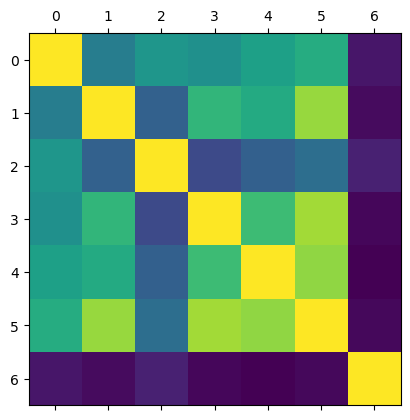

In [17]:
# creating a correlation heatmap with matplotlib
plt.matshow(df_visual.corr())
plt.show()

In [18]:
# checking for current working directory
cwd=os.getcwd()
cwd

'C:\\Users\\Sam\\Desktop\\CF\\Project 6 WORLD BANK\\6.2 Exploring Relationships'

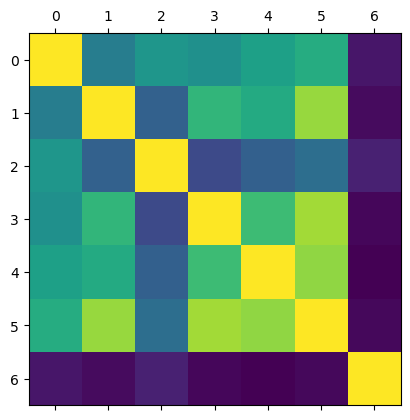

In [19]:
# saving correlation heat map in cwd
plt.matshow(df_visual.corr())
plt.savefig("correlation_heartmap.png") 


Text(0.5, 1.0, 'Correlation Matrix')

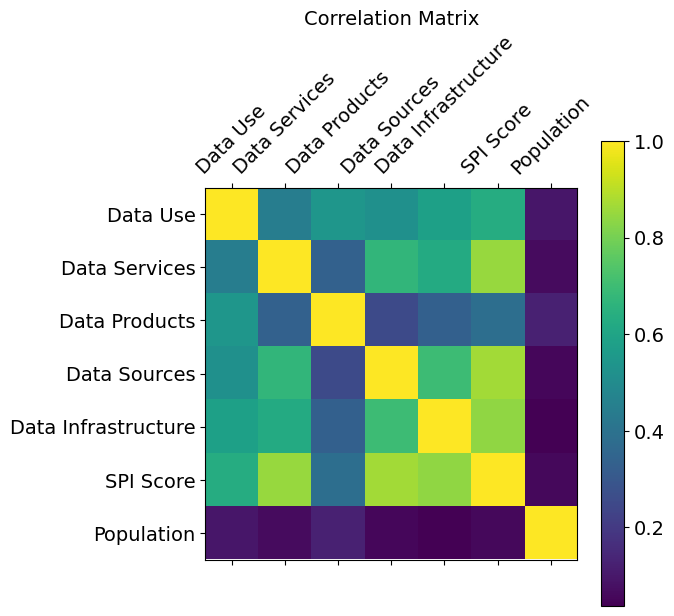

In [20]:
# Adding labels,legend,and changing size of the heatmap

f = plt.figure(figsize=(6, 6)) # figure size 
plt.matshow(df_visual.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_visual.shape[1]), df_visual.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_visual.shape[1]), df_visual.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # adding a colour legend
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### Creating a correlation heatmap using seaborn

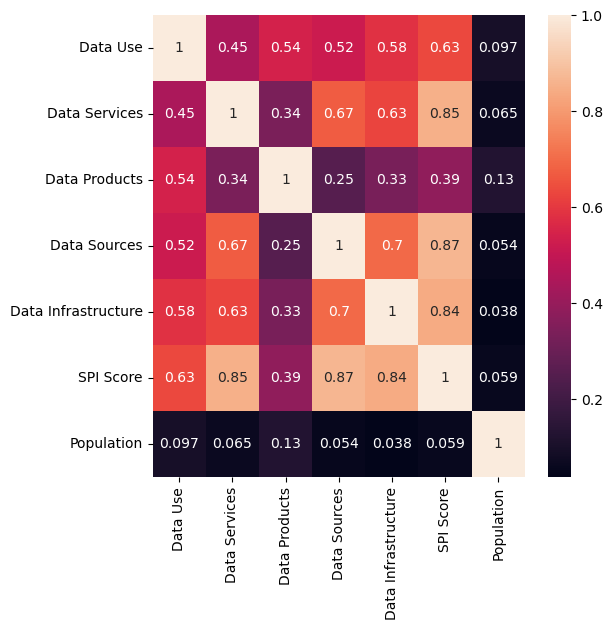

In [21]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(6,6))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_visual.corr(), annot = True, ax = ax) 

### Creating Scatterplots

In [22]:
df.columns

Index(['Country', 'Date', 'Data Use', 'Data Services', 'Data Products',
       'Data Sources', 'Data Infrastructure', 'SPI Score', 'Income', 'Region',
       'Population'],
      dtype='object')

C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


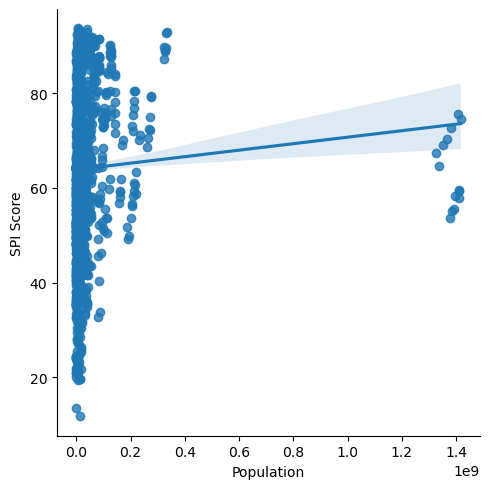

In [23]:
# creating a scatterplot 
sns.lmplot(y="SPI Score", x="Population", data = df)

### Pair plots

In [24]:
#creating a subset for "SPI score" and "population"
df_pair=df[["Population","SPI Score"]].copy()

C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


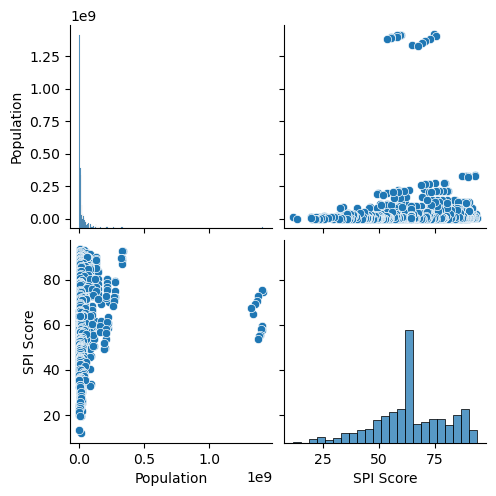

In [25]:
# creating a pairplot for the subset
plot=sns.pairplot(df_pair)

C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

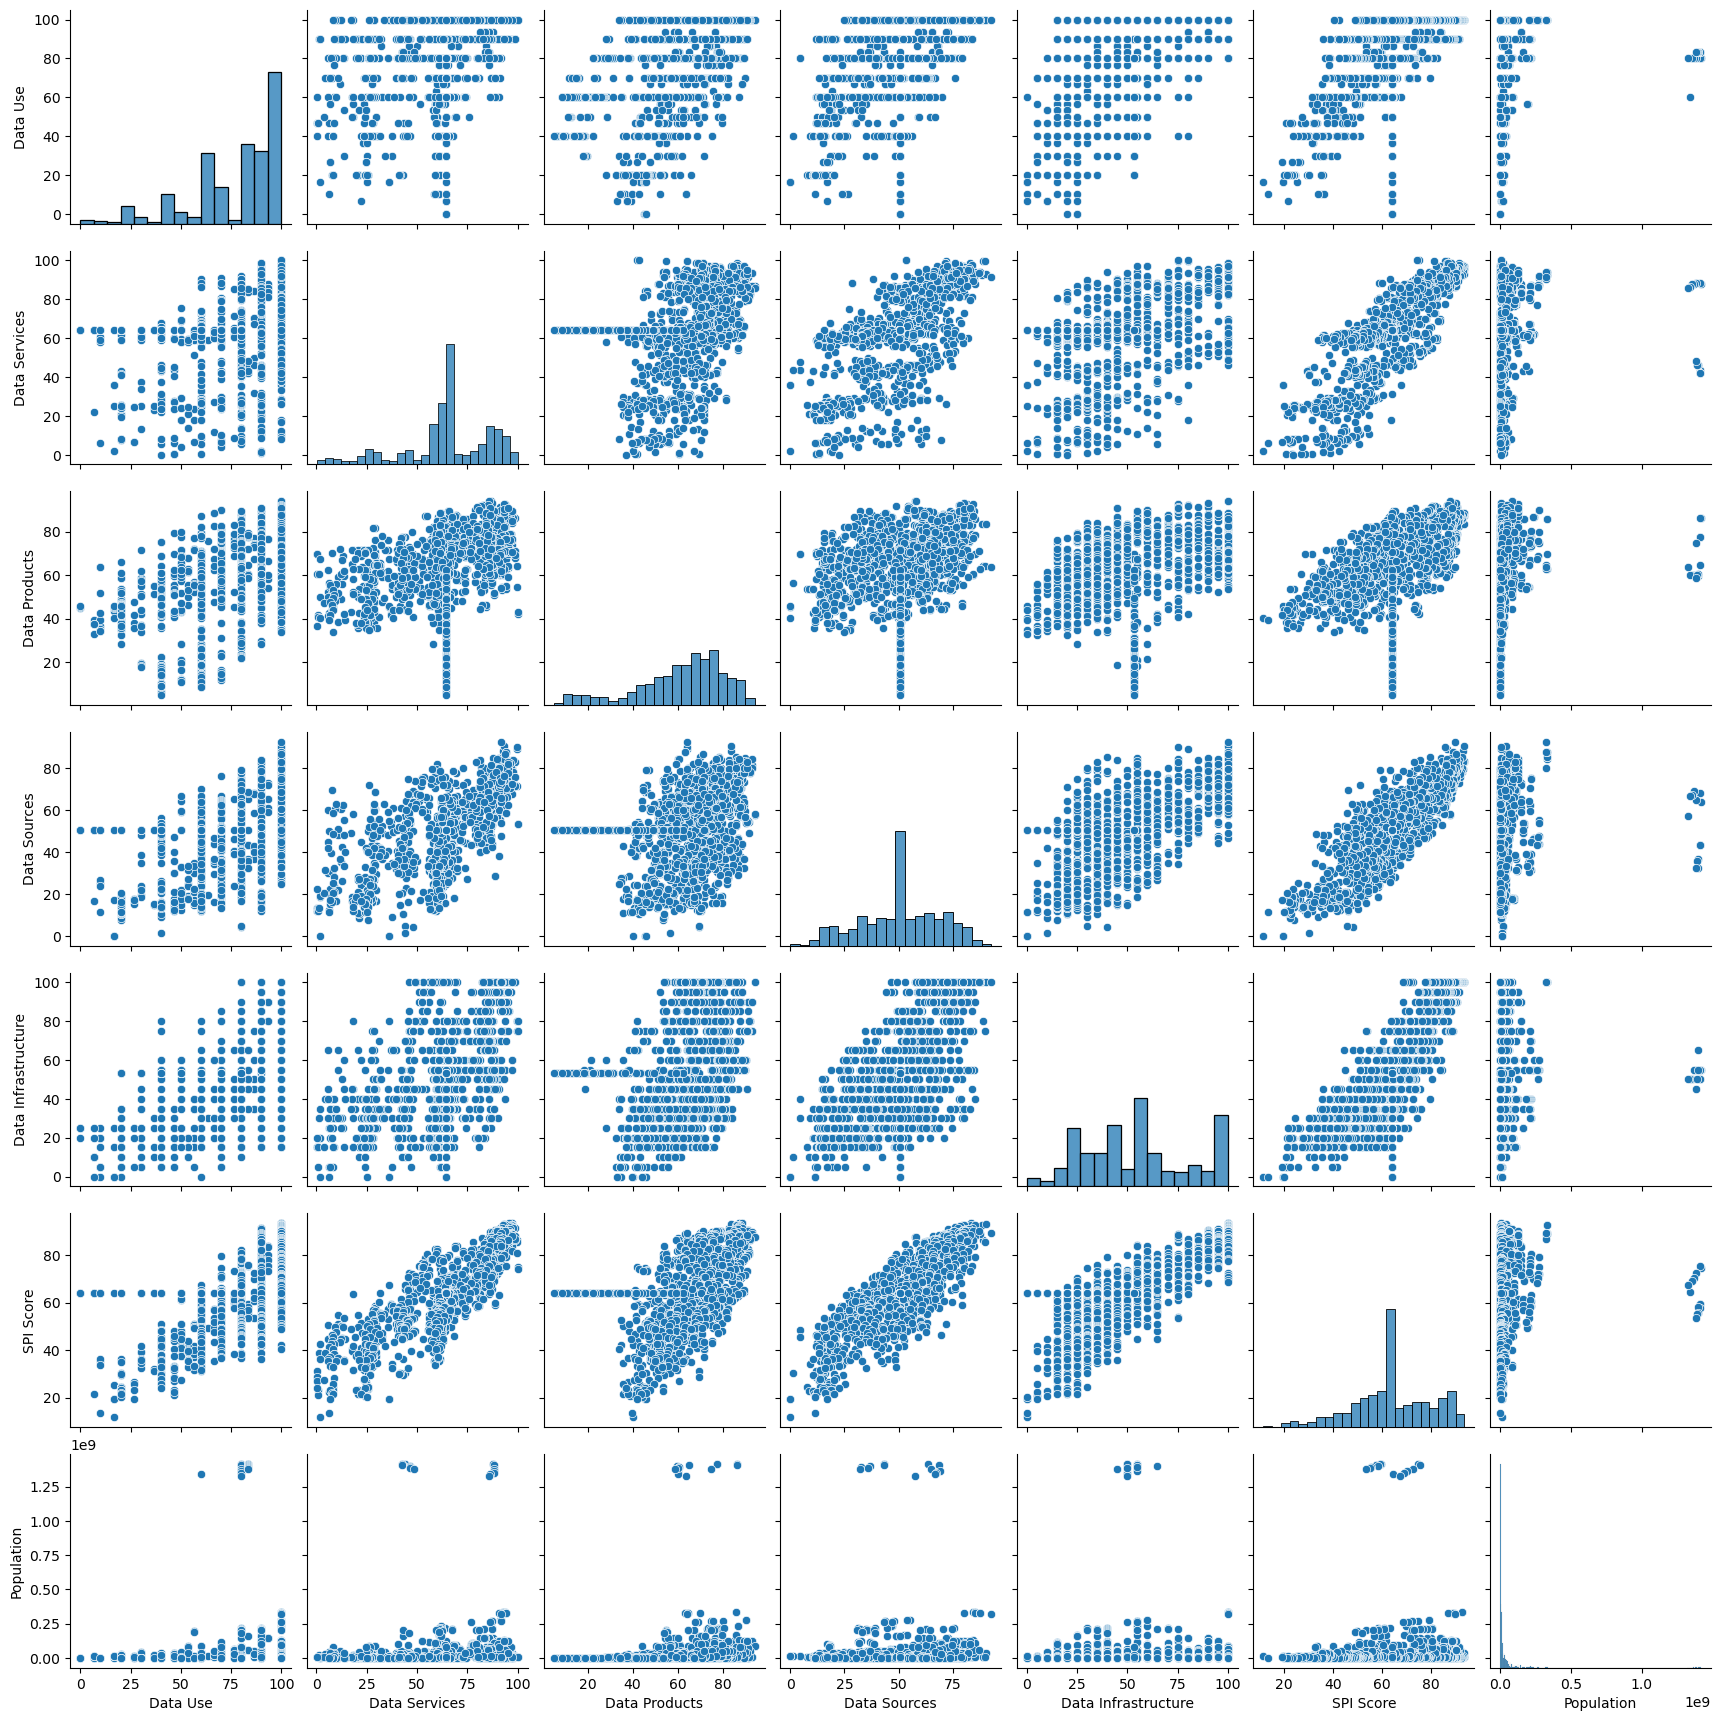

In [26]:
plots=sns.pairplot(df_visual)

### Categorical plot

C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SPI Score', ylabel='Count'>

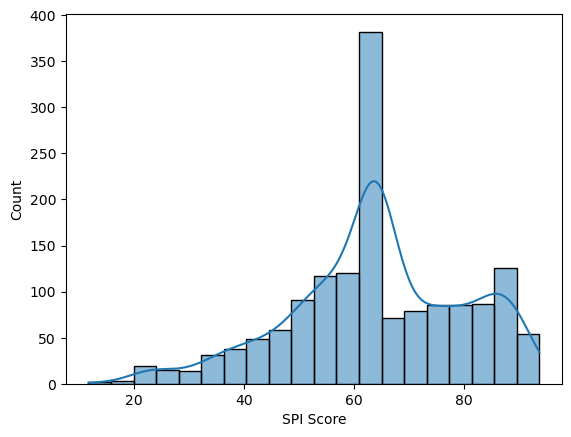

In [27]:
# creating a categorigal variable that splits "SPI Score" into categories
sns.histplot(df["SPI Score"], bins = 20, kde = True)

In [28]:
# based on the distribution I will categoreize as follows:0-45 low,45-75-medium,75 and above-high
df.loc[df["SPI Score"]<45,"Score Category"]="Low Score"
df.loc[(df["SPI Score"]>=45) & (df["SPI Score"]<75),"Score Category"]="Medium Score"
df.loc[df["SPI Score"]>=75,"Score Category"]="High Score"

In [29]:
# checking for execution
df.head(1)

,Country,Date,Data Use,Data Services,Data Products,Data Sources,Data Infrastructure,SPI Score,Income,Region,Population,Score Category
0,Finland,2022,100.0,96.433333,88.4875,83.258333,100.0,93.635833,High income,Europe & Central Asia,5556106.0,High Score


In [30]:
# getting value counts
df["Score Category"].value_counts()

Score Category
Medium Score    945
High Score      400
Low Score       179
Name: count, dtype: int64

C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


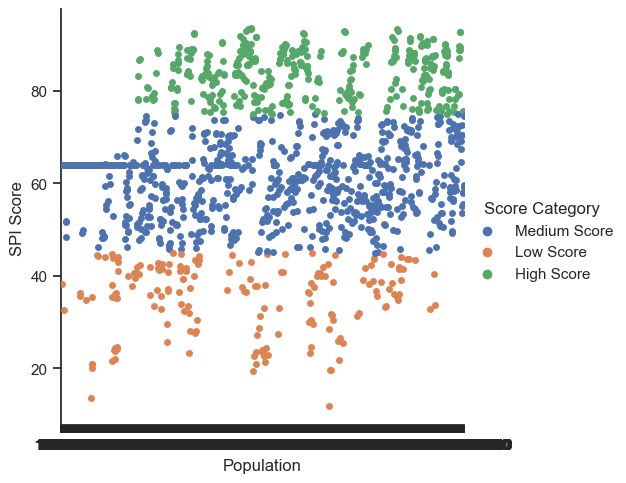

In [31]:
# Create a categorical plot in seaborn using score categories
sns.set(style="ticks")
categorical_plot=sns.catplot(x="Population", y="SPI Score", hue="Score Category", data=df)

In [32]:
# saving figure
categorical_plot.savefig("categorical_plot.png") 

In [33]:
df.to_csv(os.path.join(path,"SPI_Scores_Cleaned_Formated.csv"))

# QUESTIONS DEVELOPED IN 6.1

In [34]:
#Questions: 
#• Is there a correlation between county income and their overall SPI score?-cannot be answered now since income is qualitative ordinal in my dataset
#• Is there a relationship between regions and scores that countries in that region received?-cannot be answered now since income is qualitative nominal in my dataset
#• Does population have an effect on any of the scores countries receive?-based on my analyses so far there seems to be a weak to moderate positive correlation between the two variables.
#• Did scores change for regions over the years?-cannot be answered now since regions is qualitative nominal in my dataset
#• Did scores change for any country over the years?-cannot be answered now since country is qualitative nominal in my dataset
#• Did any country’s income level change pre and post COVID?-annot be answered now since country is qualitative nominal in my dataset
#• How did overall scores change for regions before and after the pandemic.-annot be answered now since regions is qualitative nominal in my dataset

#### As far as dealing with missing values issue I had in 6.1, I explored the data and income level had nothing to do with the quantity of missing values in the set, rather it was the infromation that was entered from 2004 to 2016 for certain countries. So I have decided to limit my dataset to include only years from 2016 to 2022, it is more recent and more complete anyways and will only be better for my analysis in the project. There were still values missing, it was less that 1% of the dataset, so I have decided to impute the missing values with average values.

In [35]:
# I will not develop any hypotheses at this point, as I want to get a clearer picture of how scores changed over years
# for different countries and different regions. The only hypothesis I can develop right now would be: 
# IF HIGH SCORE CATEGORY THEN HIGH INCOME COUNTRY

# Revision:

In [36]:
# Importing clean dataset with outliers excluded(India and China)
path1=r"C:\Users\Sam\Desktop\CF\Project 6 WORLD BANK\SPI SCORES FORMATED(INIDA AND CHINA EXCLUDED).csv"

In [37]:
final_frame=pd.read_csv(os.path.join(path1))

In [38]:
#checking for execution
final_frame.head()

,Country,Date,Data Use,Data Services,Data Products,Data Sources,Data Infrastructure,SPI Score,Income,Region,Population,Score Category
0,Finland,2022,100.0,96.433333,88.48750,83.258333,100.0,93.635833,High income,Europe & Central Asia,5556106.0,High Score
1,Norway,2022,100.0,97.133333,87.23750,83.108333,100.0,93.495833,High income,Europe & Central Asia,5457127.0,High Score
2,Canada,2022,100.0,92.600000,83.68750,88.325000,100.0,92.922500,High income,North America,38929902.0,High Score
3,Netherlands,2022,100.0,96.900000,87.76875,79.458333,100.0,92.825417,High income,Europe & Central Asia,17700982.0,High Score
4,United States,2022,100.0,93.600000,85.95000,84.400000,100.0,92.790000,High income,North America,333287557.0,High Score


In [39]:
final_frame.shape

(1496, 12)

In [40]:
#comparing 
df.shape

(1524, 12)

C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


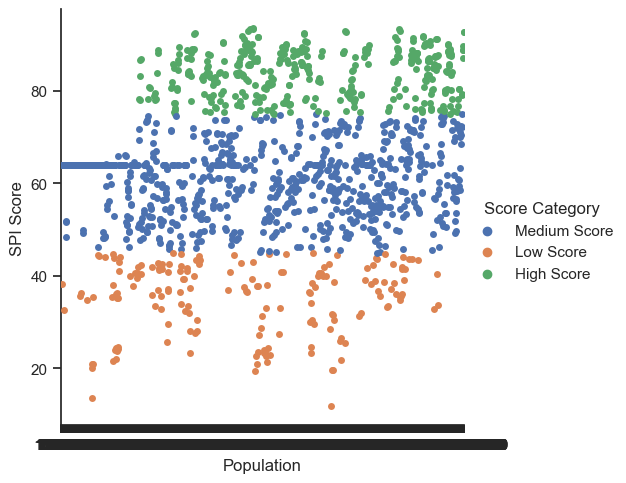

In [41]:
# Create a categorical plot in seaborn using score categories in the new DF
sns.set(style="ticks")
categorical_plot=sns.catplot(x="Population", y="SPI Score", hue="Score Category", data=final_frame)

In [42]:
# getting value count of "score category" in the new DF
final_frame["Score Category"].value_counts()

Score Category
Medium Score    918
High Score      399
Low Score       179
Name: count, dtype: int64

In [43]:
# comparing to the frame with outliers included
df["Score Category"].value_counts()

Score Category
Medium Score    945
High Score      400
Low Score       179
Name: count, dtype: int64

## Exploring Coorelations

In [44]:
df_visual_final=final_frame[["Data Use","Data Services","Data Products","Data Sources","Data Infrastructure","SPI Score","Population"]].copy()

In [46]:
#correlation matrix
df_visual_final.corr()

,Data Use,Data Services,Data Products,Data Sources,Data Infrastructure,SPI Score,Population
Data Use,1.000000,0.448613,0.550518,0.522329,0.583869,0.635797,0.254765
Data Services,0.448613,1.000000,0.340568,0.668702,0.630025,0.853108,0.176513
Data Products,0.550518,0.340568,1.000000,0.256305,0.337342,0.391510,0.291582
Data Sources,0.522329,0.668702,0.256305,1.000000,0.700717,0.866567,0.150914
Data Infrastructure,0.583869,0.630025,0.337342,0.700717,1.000000,0.842758,0.121387
SPI Score,0.635797,0.853108,0.391510,0.866567,0.842758,1.000000,0.188312
Population,0.254765,0.176513,0.291582,0.150914,0.121387,0.188312,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

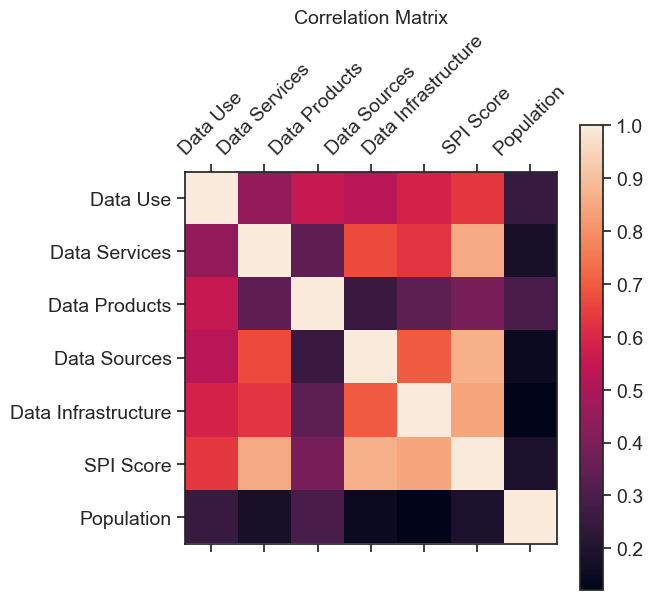

In [47]:
#creating a heatmap
f = plt.figure(figsize=(6, 6))  
plt.matshow(df_visual_final.corr(), fignum=f.number) 
plt.xticks(range(df_visual_final.shape[1]), df_visual_final.columns, fontsize=14, rotation=45) 
plt.yticks(range(df_visual_final.shape[1]), df_visual_final.columns, fontsize=14) 
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=14) 
plt.title('Correlation Matrix', fontsize=14) 

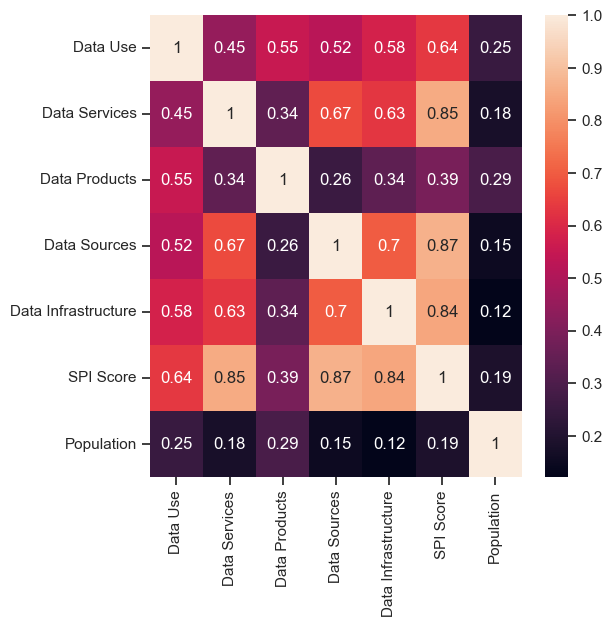

In [48]:
# Create a heatmap with subplot in  sns
f,ax = plt.subplots(figsize=(6,6))
corr = sns.heatmap(df_visual_final.corr(), annot = True, ax = ax) 

In [49]:
#creating a subset for "SPI score" and "population"
df_pair_final=final_frame[["Population","SPI Score"]].copy()

C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


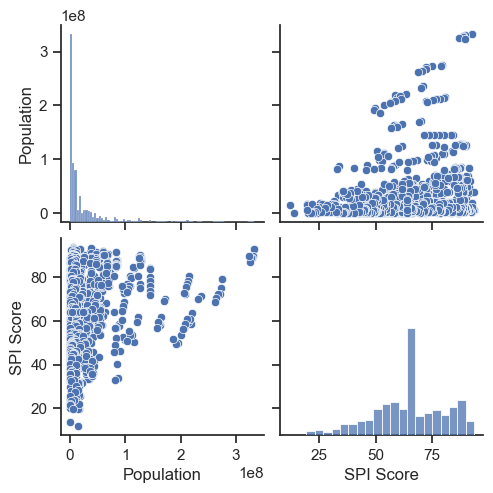

In [50]:
# creating a pairplot for the subset
plot_final=sns.pairplot(df_pair_final)

C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


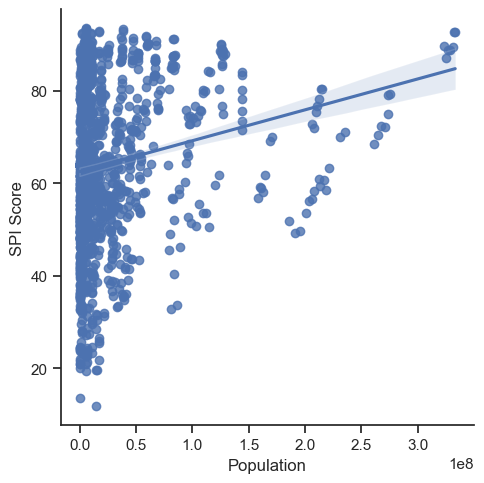

In [51]:
#creating a scatterplot for "spi score" and "population"
sns.lmplot(y="SPI Score", x="Population", data=final_frame)

### Removing the population outliers give a better picture of the correlation between the two variables; it can be clearly seen than the relationship is a lot stronger in a positive direction than with outliers.

## Questions to answer:

In [52]:
#• Is there a correlation between county income and their overall SPI score?
#• Is there a relationship between regions and scores that countries in that region received?
#• Does population have an effect on any of the scores countries receive?-based on my analyses so far there seems to be a moderate to strong positive correlation between the two variables.
#• Did scores change for regions over the years?
#• Did scores change for any country over the years?
#• Did any country’s income level change pre and post COVID?
#• How did overall scores change for regions before and after the pandemic.

In [59]:
# creating a crosstab for income and overall spi scores

In [60]:
spi_to_income

Income,High income,Low income,Lower middle income,Upper middle income
SPI Score,,,,
11.769583,0,1,0,0
13.512500,0,0,0,1
19.493333,0,0,0,1
19.617917,0,1,0,0
19.679167,0,1,0,0
...,...,...,...,...
92.929167,1,0,0,0
93.420833,1,0,0,0
93.474167,1,0,0,0


In [61]:
#saving the crosstab
spi_to_income.to_csv(os.path.join(path,"spi_to_income.csv"))

In [62]:
final_frame.head()

,Country,Date,Data Use,Data Services,Data Products,Data Sources,Data Infrastructure,SPI Score,Income,Region,Population,Score Category
0,Finland,2022,100.0,96.433333,88.48750,83.258333,100.0,93.635833,High income,Europe & Central Asia,5556106.0,High Score
1,Norway,2022,100.0,97.133333,87.23750,83.108333,100.0,93.495833,High income,Europe & Central Asia,5457127.0,High Score
2,Canada,2022,100.0,92.600000,83.68750,88.325000,100.0,92.922500,High income,North America,38929902.0,High Score
3,Netherlands,2022,100.0,96.900000,87.76875,79.458333,100.0,92.825417,High income,Europe & Central Asia,17700982.0,High Score
4,United States,2022,100.0,93.600000,85.95000,84.400000,100.0,92.790000,High income,North America,333287557.0,High Score


In [70]:
# crosstabing score category with income to get a clearer picture
score_category_to_income_normalized=pd.crosstab(final_frame["Score Category"],final_frame["Income"],normalize=True)

In [71]:
score_category_to_income_normalized

Income,High income,Low income,Lower middle income,Upper middle income
Score Category,,,,
High Score,0.173797,0.000000,0.022059,0.070856
Low Score,0.006016,0.040775,0.037433,0.035428
Medium Score,0.195856,0.091578,0.178476,0.147727


In [68]:
score_category_to_income=pd.crosstab(final_frame["Score Category"],final_frame["Income"])

In [69]:
score_category_to_income

Income,High income,Low income,Lower middle income,Upper middle income
Score Category,,,,
High Score,260,0,33,106
Low Score,9,61,56,53
Medium Score,293,137,267,221


In [73]:
#saving the crosstab
score_category_to_income.to_csv(os.path.join(path,"score_category_to_income.csv"))
score_category_to_income_normalized.to_csv(os.path.join(path,"score_category_to_income_normalized.csv"))

### the crosstab shows that the vast majority of countries receiving a high score are either in the upper middle income class or high income class. Also high income countries have the lowest number of low scores received.

In [ ]:
#based on the crosstab hypotheses can be developped to be tested:
# 1. If country has high income, they are in the high score category.
# 2. If country has low income, they are not in the high score category.